In [1]:
#!pip install backtrader

In [2]:
#!conda install -c conda-forge matplotlib==3.2.2 -y 

In [3]:
#!conda install -c anaconda ipython -y

In [4]:
#!conda install nodejs -y

In [5]:
#!conda install -c conda-forge ipympl -y

In [6]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [7]:
from datetime import datetime
import backtrader as bt

In [8]:
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        lagf = bt.ind.LAGF(period=13, gamma = 0.8)
        crossover = bt.ind.CrossOver(self.dataclose, lagf)
        self.signal_add(bt.SIGNAL_LONG, crossover)
        
        crossover2 = bt.ind.CrossOver(lagf, self.dataclose)
        self.signal_add(bt.SIGNAL_SHORT, crossover2)
        
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

In [9]:
cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

0

In [10]:
data0 = bt.feeds.YahooFinanceData(dataname='^NSEI', fromdate=datetime(2010, 1, 1),
                                  todate=datetime(2020, 11, 3))
cerebro.adddata(data0)

In [11]:
cerebro.broker.setcash(1_00_000.0)
cerebro.broker.getvalue()

100000.0

In [12]:
cerebro.run()

In [13]:
cerebro.broker.getvalue()

104851.40000000005

In [14]:
(104851 - 100000)

4851

<IPython.core.display.Javascript object>


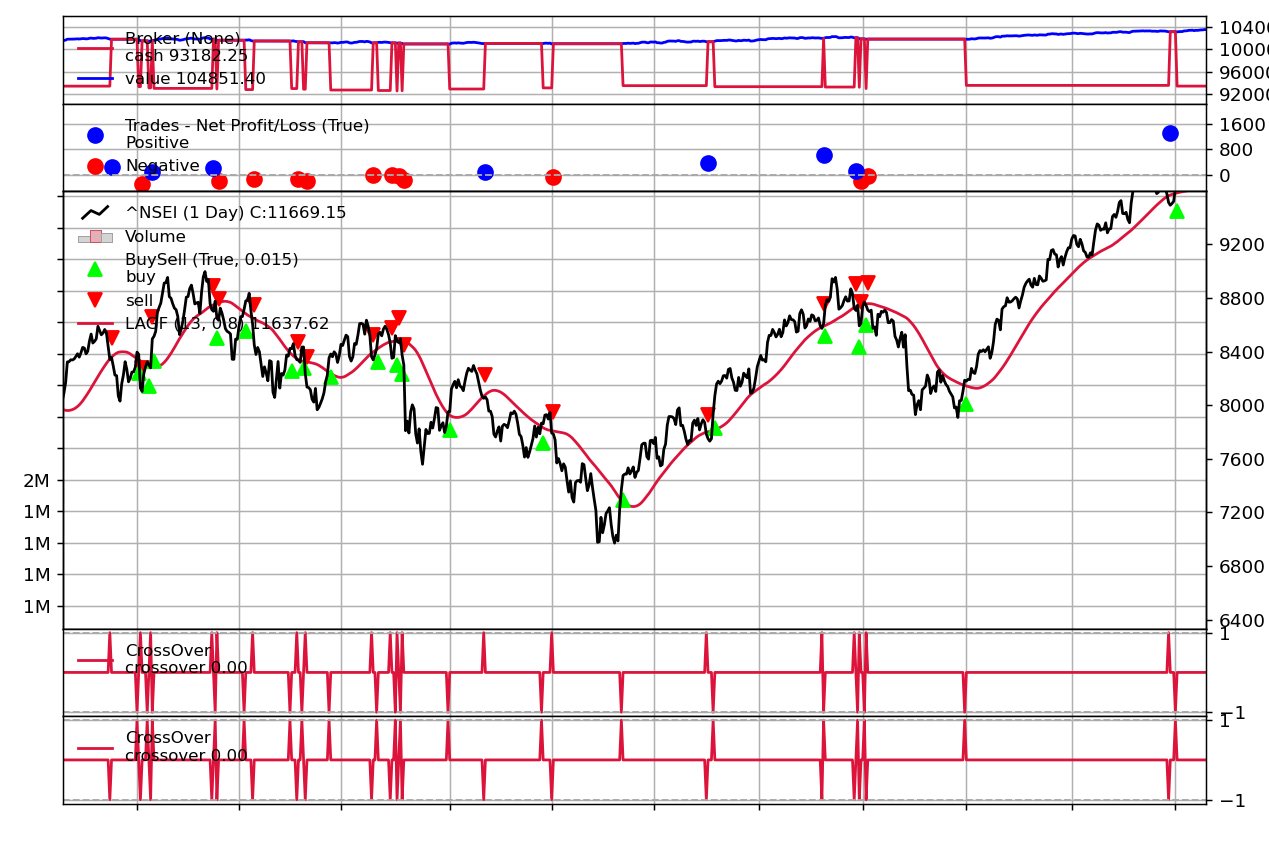

[[<Figure size 640x480 with 6 Axes>]]

In [15]:
cerebro.plot(width=30, height = 9)